In [3]:
# Data Preprocessing

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Importing the dataset
df = pd.read_csv('flats.csv', sep=';')

In [9]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,NaN,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,NaN,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


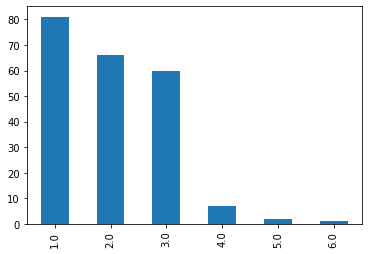

In [27]:
# Rooms number distribution
distribution = df['rooms'].value_counts()
distribution.plot(kind='bar')

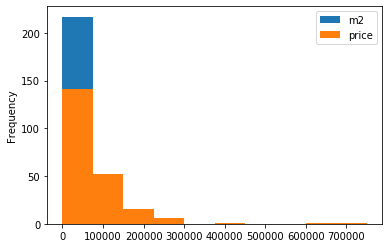

In [15]:
# M2 distribution
df['m2'].plot(kind = 'hist')

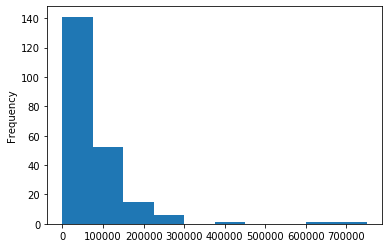

In [29]:
# Price distribution
df['price'].plot(kind = 'hist')

In [10]:
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.013889,76.331797,82427.451613
std,0.971593,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


In [21]:
# Outliers
m2 = []
for m in df['m2']:
    if m > round(df['m2'].mean() + 3 * df['m2'].std()):
        m = round(df['m2'].mean() + 3*df['m2'].std())
    m2.append(m)
df['m2']  = m2

prices = []
for price in df['price']:
    if price > df['price'].mean() + 3 * df['price'].std():
        price = df['price'].mean() + 3*df['price'].std()
    prices.append(price)
df['price'] = prices

In [29]:
# Cheking NaN
df['location'].unique(), df['condition'].unique(), df['type'].unique()

(array(['suburbs', 'center'], dtype=object),
 array(['repaired', 'unrepaireded'], dtype=object),
 array(['used', nan, 'new'], dtype=object))

In [22]:
# Taking care of missing data
# https://scikit-learn.org/
from sklearn.impute import SimpleImputer
#numeric
df[['rooms']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['rooms']]).round()
#strings
df[['type']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['type']])

In [23]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000.0
1,1.0,center,repaired,37,used,35000.0
2,3.0,suburbs,repaired,67,used,65000.0
3,2.0,suburbs,repaired,21,used,15000.0
4,1.0,suburbs,repaired,82,new,60000.0
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407.0
213,3.0,center,unrepaireded,84,new,57678.0
214,3.0,center,unrepaireded,93,new,63513.0
215,2.0,center,unrepaireded,72,new,51121.0


In [25]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
df[['location']] = LabelEncoder().fit_transform(df[['location']])
df[['condition']] = LabelEncoder().fit_transform(df[['condition']])
df[['type']] = LabelEncoder().fit_transform(df[['type']])

C:\Users\kater\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
df

,rooms,location,condition,m2,type,price
0,2.0,1,0,50,1,35000.0
1,1.0,0,0,37,1,35000.0
2,3.0,1,0,67,1,65000.0
3,2.0,1,0,21,1,15000.0
4,1.0,1,0,82,0,60000.0
...,...,...,...,...,...,...
212,2.0,0,1,65,0,46407.0
213,3.0,0,1,84,0,57678.0
214,3.0,0,1,93,0,63513.0
215,2.0,0,1,72,0,51121.0


In [26]:
# Descriptive Statistics
df.describe()

,rooms,location,condition,m2,type,price
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2.013825,0.267281,0.774194,75.631336,0.202765,78680.609688
std,0.969341,0.443564,0.419079,35.233120,0.402988,59689.357661
min,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,49.000000,0.000000,39429.000000
50%,2.000000,0.000000,1.000000,67.000000,0.000000,59548.000000
75%,3.000000,1.000000,1.000000,91.000000,0.000000,90000.000000
max,6.000000,1.000000,1.000000,190.000000,1.000000,328978.434073


In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
df['rooms'] = StandardScaler().fit_transform(df[['rooms']])
df['m2'] = StandardScaler().fit_transform(df[['m2']])
df['price'] = StandardScaler().fit_transform(df[['price']])

In [33]:
df

,rooms,location,condition,m2,type,price
0,-0.009698,1,0,-0.729161,1,-0.733528
1,-1.061956,0,0,-1.098985,1,-0.733528
2,1.042560,1,0,-0.245544,1,-0.229751
3,-0.009698,1,0,-1.554153,1,-1.069379
4,-1.061956,1,0,0.181176,0,-0.313714
...,...,...,...,...,...,...
212,-0.009698,0,1,-0.302440,0,-0.541975
213,1.042560,0,1,0.238072,0,-0.352706
214,1.042560,0,1,0.494104,0,-0.254722
215,-0.009698,0,1,-0.103304,0,-0.462815


In [20]:
# Exporting the dataset
df.to_csv('flats_prep.csv', sep=';', index=False)